In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [34]:
data_dir = '/Users/gbromley/data/CRU/'
temp_file = 'tmp/cru_ts4.02.1901.2017.tmp.dat.nc'
CRU_TEMP = xr.open_dataset(data_dir+temp_file)
WRF_TEMP = xr.open_dataset('T2M_monthly_CRU_grid.nc')

### Random Definitions
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

start_year = '2012-10-01'
end_year = '2013-10-01'

### Study Area
ngp_mask = xr.open_dataset('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/ngp_mask.nc')
ngp_mask = ngp_mask.rename({'__xarray_dataarray_variable__':'ngp'})
mask = ngp_mask['ngp']


### Extract Variables
CRU = CRU_TEMP['tmp'].sel(time=slice(start_year,end_year))

WRF = WRF_TEMP['T2']
# Convert from Kelvin to Celsius
WRF = WRF-273.15
### Ouput Data
month = ['October','November','December','January','February','March','April','May','June','July','August','September']
lat = CRU.lat
lon = CRU.lon
vals = np.empty(shape=(12,len(lat),len(lon)))
vals[:,:,:] = np.nan
DIFF = xr.DataArray(vals,coords=[month,lat,lon],dims=['month','lat','lon'])
DIFF.name = 'Fallow - NonFallow'
DIFF.attrs['units'] = 'Celsius'



In [6]:
WRF.XTIME


<xarray.DataArray 'XTIME' (XTIME: 4)>
array(['2013-04-15T22:30:00.000000000', '2013-05-16T10:30:00.000000000',
       '2013-06-15T22:30:00.000000000', '2013-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * XTIME    (XTIME) datetime64[ns] 2013-04-15T22:30:00 ... 2013-07-01
Attributes:
    standard_name:  time
    bounds:         XTIME_bnds
    axis:           T

In [25]:
CRU.isel(time=6)


<xarray.DataArray 'tmp' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    time     datetime64[ns] 2013-04-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [24]:
WRF.isel(XTIME=0)

<xarray.DataArray 'T2' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    XTIME    datetime64[ns] 2013-04-15T22:30:00
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75

In [36]:
months = [0,1,2,3,4,5,6,7,8,9,10,11]
for month in months:
    DIFF[month] = WRF.isel(XTIME=month) - CRU.isel(time=month)


In [37]:

DIFF = DIFF.sel(lat=slice(ext_s-5,ext_n+5),lon=slice(ext_w-5,ext_e+5))


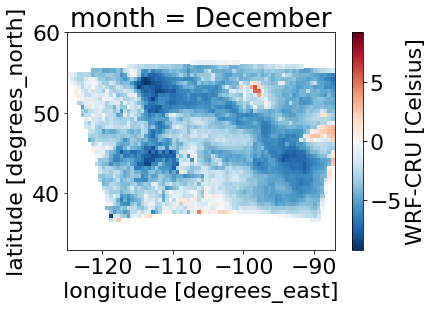

In [44]:
DIFF.isel(month=2).plot()

In [38]:
ngp = DIFF.where(mask==1)
test = ngp.stack(z=('lat','lon'))
#
season_values = test.groupby('month').apply(lambda x: x.dropna(dim='z'))

Text(0, 0.5, 'T2M Difference ($^\\circ$C)')

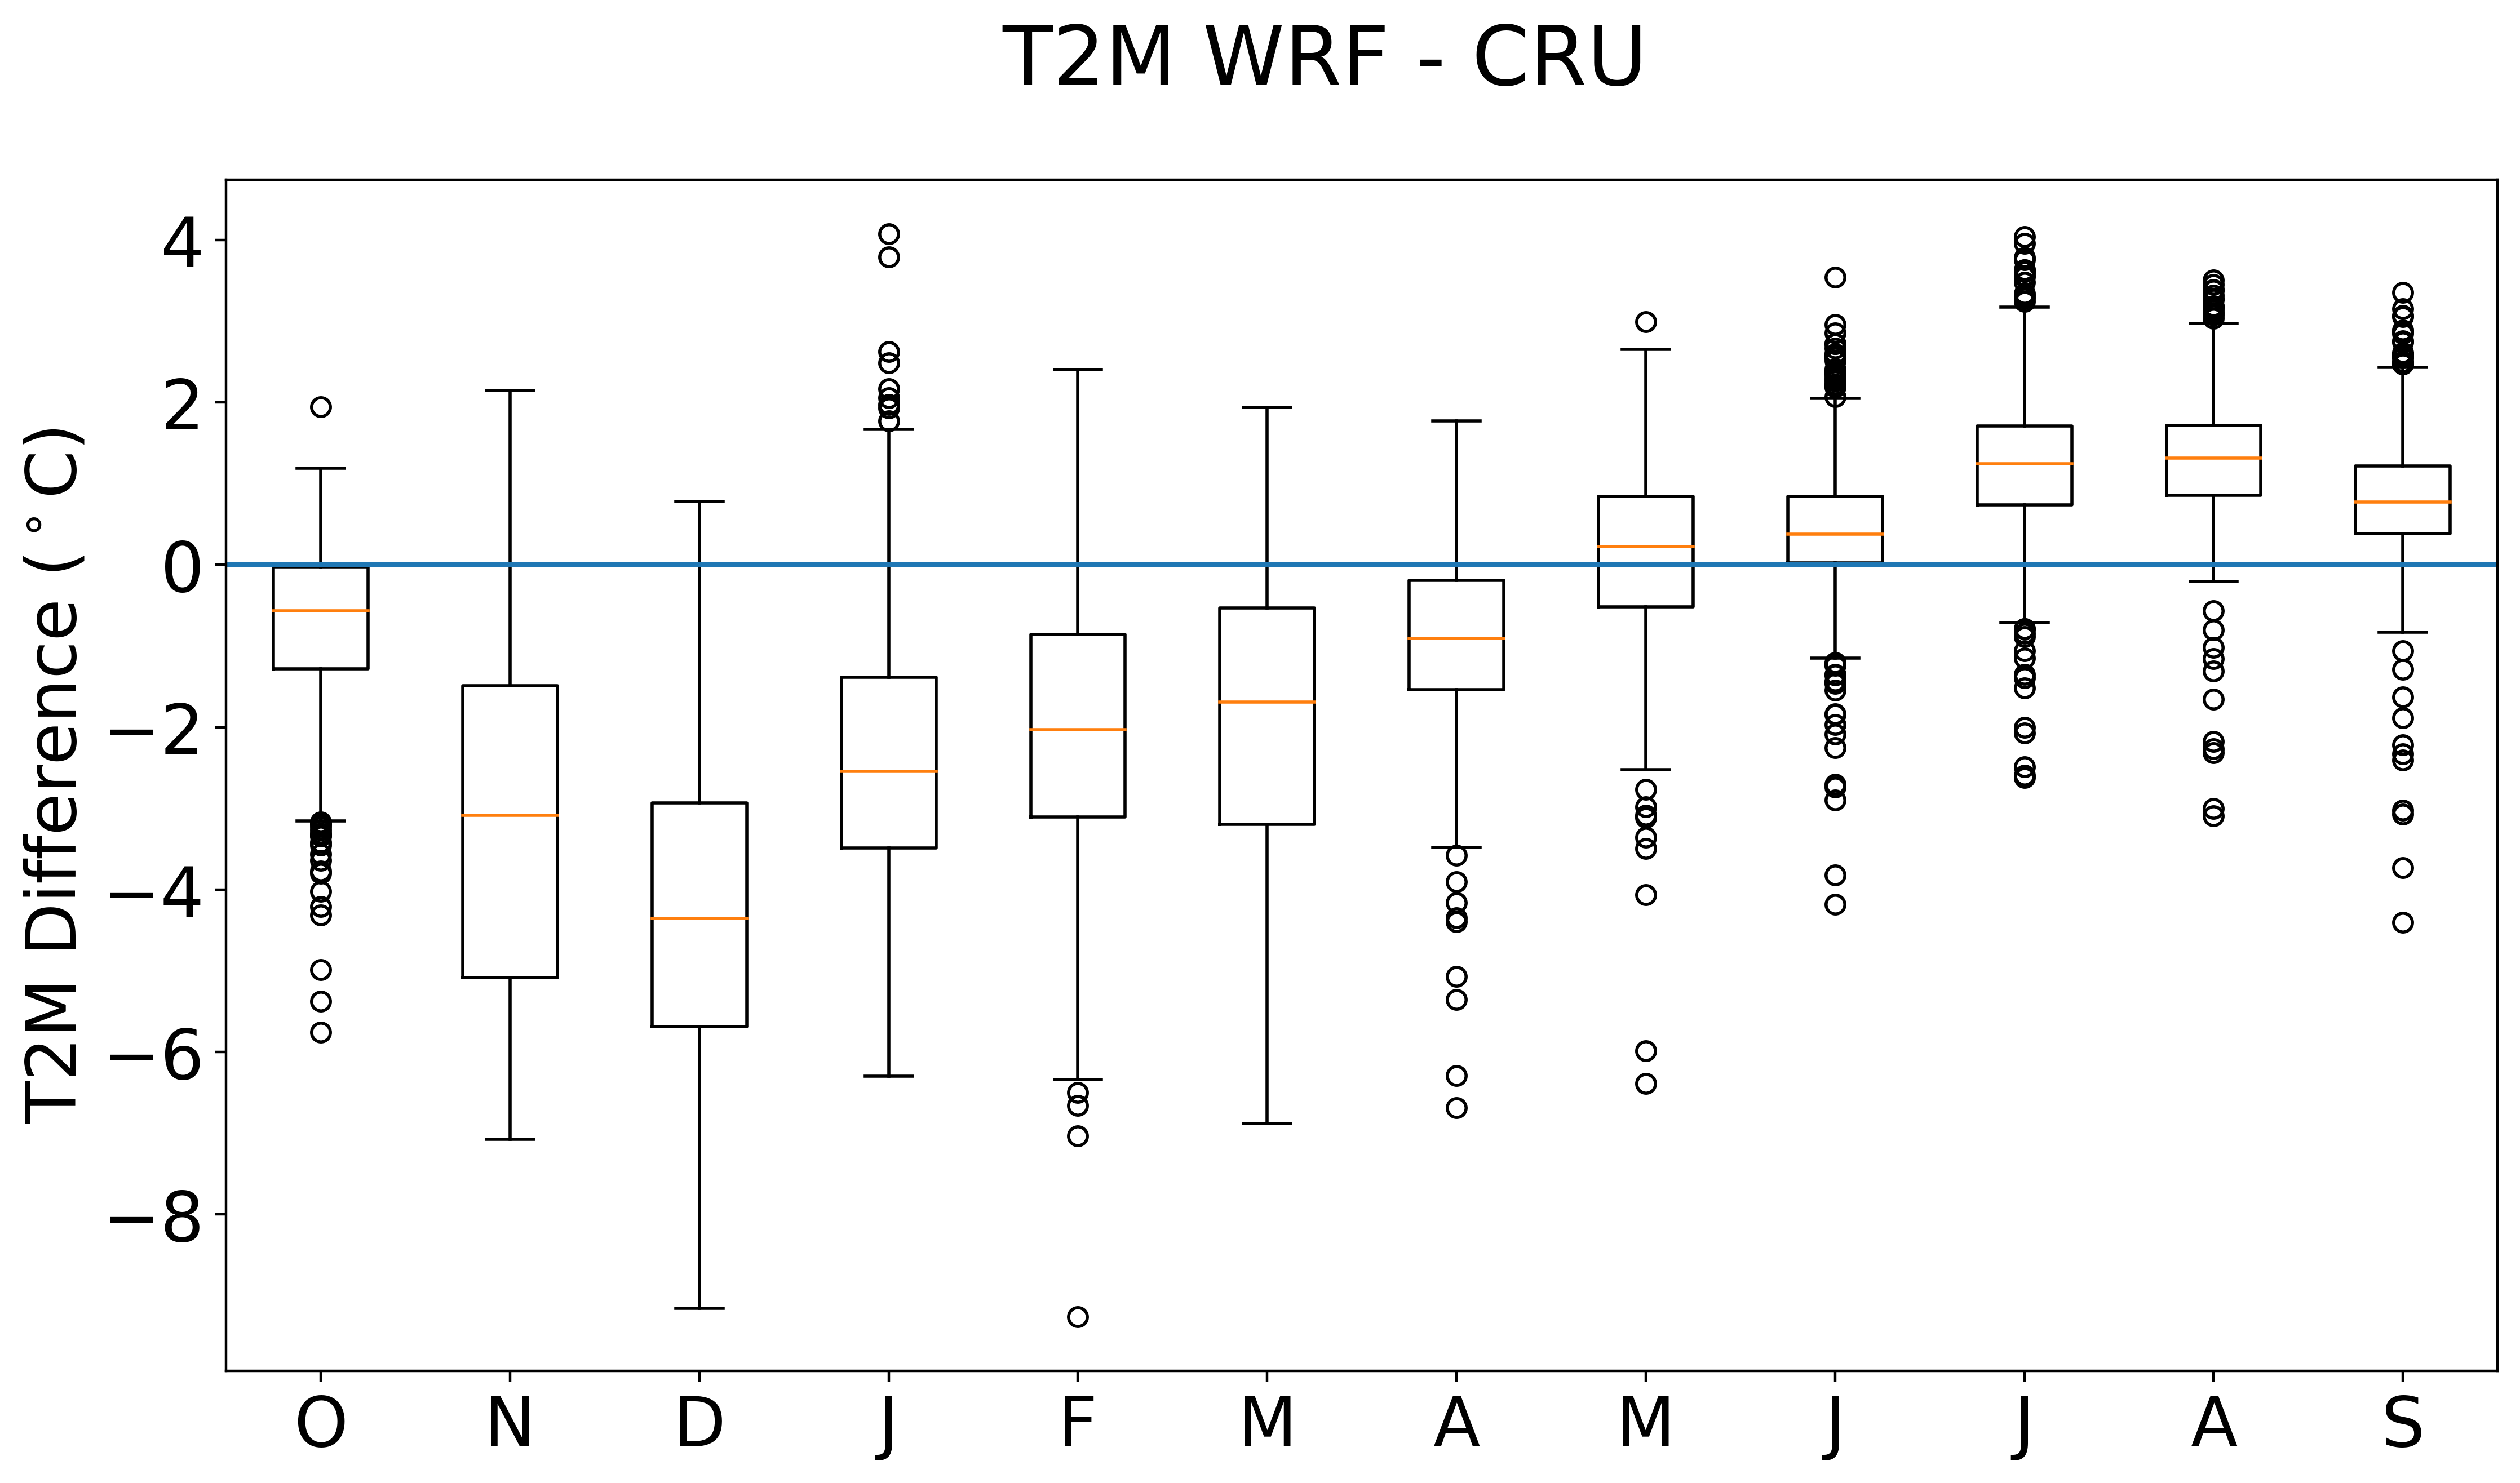

In [43]:
plt.rcParams.update({'font.size': 22})
month = ['O','N','D','J','F','M','A','M','J','J','A','S']
#month = ['A','M','J']
fig, ax = plt.subplots(ncols=1)
fig.set_dpi(400)
fig.set_size_inches((13,7))
fig.suptitle('T2M WRF - CRU')
pos = np.array(range(len(season_values))) + 1
plt.boxplot(season_values, positions=pos)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12], month)
ax.axhline(0)

ax.set_ylabel('T2M Difference ($^\circ$C)')
#plt.savefig('/Users/gbromley/Dropbox/Montana_Climate_Project/NGP Modeling Paper/Figures/WY_2013_CRU-WRF-diff.png',bbox_inches='tight')
